In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
import qutip as qt 

#  Jaynes-Cumming model 

$$
H = \hbar \omega_c a^\dagger a + \frac{1}{2} \hbar \omega_a \sigma_z + \hbar g 
(a^\dagger + a)(\sigma_- + \sigma_+)
$$

Aftetr RWA 
$$
H_{RWA} = \hbar \omega_c a^\dagger a + \frac{1}{2} \hbar \omega_a \sigma_z + 
\hbar g (a^\dagger \sigma_- + a \sigma_+)
$$

In [8]:
# Problem parameters
# ħ = 1
wc = 2*np.pi;
wa = 2*np.pi;
g = 0.1*np.pi;
κ = 0.005;  # cavity dissipation rate 
γ = 0.05;  # atom dissipation rate
N = 15;
n_th_a = 0.0;  # avg number of thermal bath excitation
use_rwa = True;
tlist = np.linspace(0,25,101);

In [9]:
# inial state
ψ0 = qt.tensor(qt.basis(N,0), qt.basis(2,1))

In [13]:
# operators 
ad = qt.tensor(qt.create(N), qt.qeye(2))
a = qt.tensor(qt.destroy(N),qt.qeye(2))
sp = qt.tensor(qt.qeye(N), qt.create(2))
sm = qt.tensor(qt.qeye(N), qt.destroy(2))
sz = qt.tensor(qt.qeye(N), qt.sigmaz())
# where we do not use RWA approx
# H = wc * ad * a + (wa/2)*sz + g*(ad * sm + ad*sp + a*sm + a*sp)
H2 = wc * ad * a + (wa/2)*sz + g*(ad * sm + ad*sp + a*sm + a*sp)

# Where we use RWA approx
# H_rwa = wc * ad * a + (wa/2)*sz + g*(a*sp + ad*sm)
H_rwa2 = wc * ad * a + wa*sp*sm + g*(ad*sm + a*sp)                    

In [14]:
# collapse operators
c_ops = [];
# cavity relaxation   # `what is cavity_relation`
rate = κ * (1 + n_th_a);
if rate > 0:
    c_ops.append(np.sqrt(rate) * a)

# cavity excitation, if temperature > 0
rate = κ * n_th_a 
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * ad)

# qubit relaxation
rate = γ
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * sm)

In [15]:
# Evolve the system
output = qt.mesolve(H_rwa2, ψ0, tlist, c_ops, [ad*a, sp*sm]) 

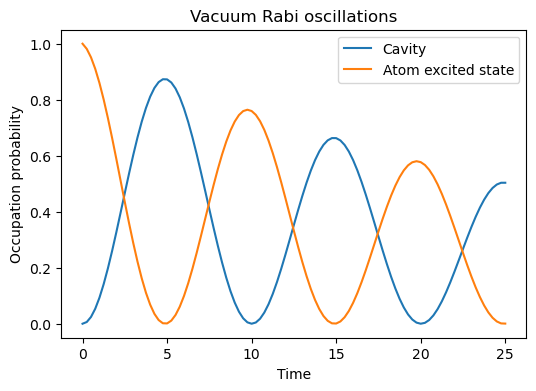

In [17]:
# Visualize the results
n_c = output.expect[0]
n_a = output.expect[1]
fig, axes = plt.subplots(1,1,figsize=(6,4))
axes.plot(tlist, n_c, label="Cavity")
axes.plot(tlist, n_a, label="Atom excited state")
axes.set_xlabel("Time")
axes.set_ylabel("Occupation probability")
axes.set_title("Vacuum Rabi oscillations")
axes.legend()
plt.show()